In [7]:
from DSGRN import *
import csv

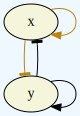

In [8]:
net_spec = 'x : x ~y\n y : ~x y'

network = DSGRN.Network(net_spec)
parameter_graph = DSGRN.ParameterGraph(network)

DSGRN.DrawGraph(network)

Read hysteresis paths data from file.

In [9]:
hyst_paths_fname = 'hysteresis_paths_2_nodes.csv'

hysteretic_paths = []
with open(hyst_paths_fname, 'r') as csv_file:
    csv_reader = csv.reader(csv_file)
    for row in csv_reader:
        # Transfor str to integers
        path = [int(p) for p in row]
        hysteretic_paths.append(path)

In [10]:
print('Number of hysteresis paths:', len(hysteretic_paths))

Number of hysteresis paths: 133


List of hysteresis paths

In [11]:
hysteretic_paths

[[245, 251, 256, 258, 259],
 [245, 251, 256, 258],
 [245, 251, 253, 258, 259],
 [245, 251, 253, 258],
 [245, 251, 253],
 [243, 249, 254, 255, 256, 258, 259],
 [243, 249, 254, 255, 256, 258],
 [243, 249, 254, 255, 257, 258, 259],
 [243, 249, 254, 255, 257, 258],
 [243, 249, 250, 251, 256, 258, 259],
 [243, 249, 250, 251, 256, 258],
 [243, 249, 250, 251, 253, 258, 259],
 [243, 249, 250, 251, 253, 258],
 [243, 249, 250, 251, 253],
 [243, 249, 250, 255, 256, 258, 259],
 [243, 249, 250, 255, 256, 258],
 [243, 249, 250, 255, 257, 258, 259],
 [243, 249, 250, 255, 257, 258],
 [243, 249, 250, 252, 253, 258, 259],
 [243, 249, 250, 252, 253, 258],
 [243, 249, 250, 252, 253],
 [243, 249, 250, 252, 257, 258, 259],
 [243, 249, 250, 252, 257, 258],
 [241, 243, 249, 254, 255, 256, 258, 259],
 [241, 243, 249, 254, 255, 256, 258],
 [241, 243, 249, 254, 255, 257, 258, 259],
 [241, 243, 249, 254, 255, 257, 258],
 [241, 243, 249, 250, 251, 256, 258, 259],
 [241, 243, 249, 250, 251, 256, 258],
 [241, 243, 2

Let's look at a particular hysteretic path.

In [12]:
# Pick a particular hysteretic path
hyst_path = hysteretic_paths[23]

Print parameter information along the path

In [13]:
for par_index in hyst_path:
    parameter = parameter_graph.parameter(par_index)
    print('index:', par_index, ', parameter:', parameter)

index: 241 , parameter: [["x",[2,2,"40"],[0,1]],["y",[2,2,"DC"],[0,1]]]
index: 243 , parameter: [["x",[2,2,"50"],[0,1]],["y",[2,2,"DC"],[0,1]]]
index: 249 , parameter: [["x",[2,2,"D0"],[0,1]],["y",[2,2,"DC"],[0,1]]]
index: 254 , parameter: [["x",[2,2,"F0"],[0,1]],["y",[2,2,"DC"],[0,1]]]
index: 255 , parameter: [["x",[2,2,"F4"],[0,1]],["y",[2,2,"DC"],[0,1]]]
index: 256 , parameter: [["x",[2,2,"F5"],[0,1]],["y",[2,2,"DC"],[0,1]]]
index: 258 , parameter: [["x",[2,2,"FD"],[0,1]],["y",[2,2,"DC"],[0,1]]]
index: 259 , parameter: [["x",[2,2,"FF"],[0,1]],["y",[2,2,"DC"],[0,1]]]


Print Morse graphs along the path

In [14]:
for par_index in hyst_path:
    parameter = parameter_graph.parameter(par_index)
    domain_graph = DSGRN.DomainGraph(parameter)
    morse_decomp = DSGRN.MorseDecomposition(domain_graph.digraph())
    morse_graph = DSGRN.MorseGraph(domain_graph, morse_decomp)
    morse_graph_poset = morse_graph.poset()
    annotations = [morse_graph.annotation(n)[0] for n in range(morse_graph.poset().size())]
    print('index:', par_index, ', Morse sets:', annotations)

index: 241 , Morse sets: ['FP { 0, 2 }']
index: 243 , Morse sets: ['FP { 0, 2 }']
index: 249 , Morse sets: ['FP { 0, 2 }', 'FP { 2, 0 }']
index: 254 , Morse sets: ['FP { 0, 2 }', 'FP { 2, 0 }']
index: 255 , Morse sets: ['FP { 0, 2 }', 'FP { 1, 2 }', 'FP { 2, 0 }']
index: 256 , Morse sets: ['FP { 1, 2 }', 'FP { 2, 0 }']
index: 258 , Morse sets: ['FP { 2, 0 }']
index: 259 , Morse sets: ['FP { 2, 0 }']


Draw table of Morse sets along the path

In [15]:
Table(["Parameter Index", "Morse Graph"], 
      [[p, DrawGraph(MorseGraph(DomainGraph(parameter_graph.parameter(p))))] for p in hyst_path])

Parameter Index,Morse Graph
241,"digraph { 0[label=""FP { 0, 2 }""]; }"
243,"digraph { 0[label=""FP { 0, 2 }""]; }"
249,"digraph { 0[label=""FP { 0, 2 }""]; 1[label=""FP { 2, 0 }""]; }"
254,"digraph { 0[label=""FP { 0, 2 }""]; 1[label=""FP { 2, 0 }""]; }"
255,"digraph { 0[label=""FP { 0, 2 }""]; 1[label=""FP { 1, 2 }""]; 2[label=""FP { 2, 0 }""]; }"
256,"digraph { 0[label=""FP { 1, 2 }""]; 1[label=""FP { 2, 0 }""]; }"
258,"digraph { 0[label=""FP { 2, 0 }""]; }"
259,"digraph { 0[label=""FP { 2, 0 }""]; }"
